## Job Flow - US 2009/2010
Occupational mobility patterns refer to the movement of individuals across different occupations over a specific period of time. Understanding these patterns can be crucial for policymakers, as it sheds light on labor market dynamics and can inform strategies related to education, workforce training, and economic development.
In this case the data have been scraped from the Current Population Survey and it analyses the movement of US workers from 2009 to 2010. The dataset contains 503 different job category which, for manipulation reasons have been clustered in the major job description. Futhermore, the dataset has 36697 links.
## Meaning of the edges:
Each link means that a worked (for privacy reason they are anonymus, and therefore the nodes have no attributes) moved from a specific sector (Source) to another one (Target). In this analysis I will not demonstrate the reasons why this happened but the paths. Each link has a specific weight based on the intensity of the transfer of workers.

## Why 2009-2010? 
The choice was motivated because of the 2008's crisis and how such big economic shocks can influence the decisions of workers.

## 1. Most Common Pathways for Occupational Transitions:
Pathways for occupational transitions represent the sequences of job changes individuals go through during their career. Analyzing the dataset can reveal the most common sequences of transitions. This involves identifying pairs or sequences of occupations that occur frequently.
Identifying the most common pathways can offer insights into typical career trajectories, helping policymakers and educators understand prevalent routes within the labor market.

## 2. Clusters or Communities of Occupations:
Clusters or communities in occupational mobility represent groups of occupations that frequently transition among themselves but have fewer connections with occupations outside the group.
Network analysis techniques can be applied to identify clusters or communities. Understanding these clusters can provide valuable information about occupational ecosystems, highlighting areas where certain skill sets are more interchangeable and showcasing the interconnectedness of specific occupations.

### Future research question: 
How do the most common pathways for occupational transitions differ across demographic groups (age, gender, education level)?
Are there specific industries or sectors that act as hubs for occupational mobility, facilitating transitions across multiple occupations?
Do certain occupations serve as "bridges" connecting distinct clusters or communities within the occupational network?

In [1]:
import networkx as nx
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import plotly.graph_objects as go
from networkx.algorithms import community
from floweaver import *
from sklearn.linear_model import LinearRegression

In [2]:
file_path = "/Users/jacopobinati/Desktop/jobflow/job_mobility_network_09_10"

D = nx.Graph()

with open(file_path, 'r') as file:
    for line in file:
        source, target, weight = line.strip().split()
        D.add_edge(source, target, weight=float(weight))

#spanning_tree = nx.minimum_spanning_tree(D)
spanning_tree = nx.maximum_spanning_tree(D)
threshold = 0.8
edges_to_remove = [(u, v) for u, v, d in D.edges(data=True) if d['weight'] < threshold]
D.remove_edges_from(edges_to_remove)
backbone = nx.Graph(spanning_tree.edges())

num_nodes = len(backbone.nodes())
num_links = len(backbone.edges())

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_links}")

Number of nodes: 503
Number of edges: 502


In [3]:
G  = pd.read_excel('/Users/jacopobinati/Desktop/jobflow/labornetwork_cat.xlsx')
G

,Source_cat,Source,Target,Target_cat,Weight
0,Architecture and Engineering Occupations,AE,MO,Management Occupation,18
1,Architecture and Engineering Occupations,AE,MO,Management Occupation,14
2,Architecture and Engineering Occupations,AE,MO,Management Occupation,1
3,Architecture and Engineering Occupations,AE,MO,Management Occupation,8
4,Architecture and Engineering Occupations,AE,MO,Management Occupation,1
...,...,...,...,...,...
36692,Transportation Occupations,TO,MMO,Material Moving Occupations,29
36693,Transportation Occupations,TO,MMO,Material Moving Occupations,1
36694,Transportation Occupations,TO,MMO,Material Moving Occupations,1
36695,Transportation Occupations,TO,MMO,Material Moving Occupations,18


In [4]:
H = nx.DiGraph()
H.add_edges_from(G[['Source', 'Target']].values)
pos = nx.spring_layout(H)
print(H.nodes, len(H.edges))
print(H.edges, len(H.edges))

['AE', 'MO', 'BFO ', 'CM', 'LPSS', 'CSS', 'LO', 'EIL', 'ADESM', 'HPTO', 'HS', 'PSO', 'FPSR', 'BGCM', 'PCS', 'SR', 'OAS', 'FFF', 'CT', 'IMRW', 'PO', 'TO', 'MMO', 'MOS'] 558
[('AE', 'MO'), ('AE', 'BFO '), ('AE', 'CM'), ('AE', 'AE'), ('AE', 'LPSS'), ('AE', 'CSS'), ('AE', 'LO'), ('AE', 'EIL'), ('AE', 'ADESM'), ('AE', 'HPTO'), ('AE', 'HS'), ('AE', 'PSO'), ('AE', 'FPSR'), ('AE', 'BGCM'), ('AE', 'PCS'), ('AE', 'SR'), ('AE', 'OAS'), ('AE', 'FFF'), ('AE', 'CT'), ('AE', 'IMRW'), ('AE', 'PO'), ('AE', 'TO'), ('AE', 'MMO'), ('AE', 'MOS'), ('MO', 'MO'), ('MO', 'BFO '), ('MO', 'CM'), ('MO', 'AE'), ('MO', 'LPSS'), ('MO', 'CSS'), ('MO', 'LO'), ('MO', 'EIL'), ('MO', 'ADESM'), ('MO', 'HPTO'), ('MO', 'HS'), ('MO', 'PSO'), ('MO', 'FPSR'), ('MO', 'BGCM'), ('MO', 'PCS'), ('MO', 'SR'), ('MO', 'OAS'), ('MO', 'FFF'), ('MO', 'CT'), ('MO', 'IMRW'), ('MO', 'PO'), ('MO', 'TO'), ('MO', 'MMO'), ('MO', 'MOS'), ('BFO ', 'MO'), ('BFO ', 'BFO '), ('BFO ', 'CM'), ('BFO ', 'AE'), ('BFO ', 'LPSS'), ('BFO ', 'CSS'), ('BFO ',

In [5]:
for row in G.itertuples():
    H.add_edge(row.Source, row.Target, weight=row.Weight)
weights = nx.get_edge_attributes(H, 'weight')
print(weights)

{('AE', 'MO'): 2, ('AE', 'BFO '): 3, ('AE', 'CM'): 1, ('AE', 'AE'): 4, ('AE', 'LPSS'): 10, ('AE', 'CSS'): 2, ('AE', 'LO'): 4, ('AE', 'EIL'): 1, ('AE', 'ADESM'): 1, ('AE', 'HPTO'): 1, ('AE', 'HS'): 1, ('AE', 'PSO'): 4, ('AE', 'FPSR'): 4, ('AE', 'BGCM'): 6, ('AE', 'PCS'): 1, ('AE', 'SR'): 1, ('AE', 'OAS'): 6, ('AE', 'FFF'): 1, ('AE', 'CT'): 3, ('AE', 'IMRW'): 2, ('AE', 'PO'): 1, ('AE', 'TO'): 2, ('AE', 'MMO'): 3, ('AE', 'MOS'): 2, ('MO', 'MO'): 31, ('MO', 'BFO '): 3, ('MO', 'CM'): 4, ('MO', 'AE'): 3, ('MO', 'LPSS'): 12, ('MO', 'CSS'): 4, ('MO', 'LO'): 15, ('MO', 'EIL'): 9, ('MO', 'ADESM'): 13, ('MO', 'HPTO'): 12, ('MO', 'HS'): 9, ('MO', 'PSO'): 3, ('MO', 'FPSR'): 1, ('MO', 'BGCM'): 16, ('MO', 'PCS'): 1, ('MO', 'SR'): 18, ('MO', 'OAS'): 36, ('MO', 'FFF'): 1, ('MO', 'CT'): 1, ('MO', 'IMRW'): 20, ('MO', 'PO'): 26, ('MO', 'TO'): 2, ('MO', 'MMO'): 3, ('MO', 'MOS'): 2, ('BFO ', 'MO'): 8, ('BFO ', 'BFO '): 8, ('BFO ', 'CM'): 4, ('BFO ', 'AE'): 4, ('BFO ', 'LPSS'): 1, ('BFO ', 'CSS'): 1, ('BFO '

In [6]:
for row in G.itertuples():
    H.add_edge(row.Source, row.Target, weight=row.Weight)
labels_mapping = dict(zip(G['Source'], G['Source_cat'] + ' (' + G['Weight'].astype(str) + ')'))
labels_mapping.update(dict(zip(G['Target'], G['Target_cat'] + ' (' + G['Weight'].astype(str) + ')')))
nx.set_node_attributes(H, labels_mapping, 'label')

pos = nx.spring_layout(H)

# Print the number of nodes and edges
print("Number of nodes:", len(H.nodes))
print("Number of edges:", len(H.edges))

# Print the nodes and edges along with labels
print("Nodes:", H.nodes(data=True))
print("Edges:", H.edges)

Number of nodes: 24
Number of edges: 558
Nodes: [('AE', {'label': 'Architecture and Engineering Occupations (2)'}), ('MO', {'label': 'Management Occupation (6)'}), ('BFO ', {'label': 'Business and Financial Operations Occupations  (2)'}), ('CM', {'label': 'Computer and Mathematical Occupations (3)'}), ('LPSS', {'label': 'Life, Physical, and Social Science Occupations (3)'}), ('CSS', {'label': 'Community and Social Services Occupations (2)'}), ('LO', {'label': 'Legal Occupations (4)'}), ('EIL', {'label': 'Education Instruction, and Library Occupations (2)'}), ('ADESM', {'label': 'Arts, Design, Entertainment, Sports, and Media Occupations (1)'}), ('HPTO', {'label': 'Healthcare Practitioners and Technical Occupations (6)'}), ('HS', {'label': 'Healthcare Support Occupations (5)'}), ('PSO', {'label': 'Protective Service Occupations (4)'}), ('FPSR', {'label': 'Food Preparation and Serving Related Occupations (1)'}), ('BGCM', {'label': 'Building and Grounds Cleaning and Maintenance Occupation

In [7]:
G['action'] = 'exit'
G.loc[G['Target_cat'].notnull(), 'action'] = 'Entry'
G.loc[G['Target_cat'] == G['Source_cat'], 'action'] = 'No Change'

# Create a table showing the count of entries and exits for each job category
entry_exit_table = pd.crosstab(G['Target_cat'], G['action'])

print(entry_exit_table)

action                                              Entry  No Change
Target_cat                                                          
Architecture and Engineering Occupations             1057        140
Arts, Design, Entertainment, Sports, and Media ...   1104         96
Building and Grounds Cleaning and Maintenance O...    933         14
Business and Financial Operations Occupations        1795        176
Community and Social Services Occupations             618         22
Computer and Mathematical Occupations                1016         63
Construction Trades                                  1987        362
Education Instruction, and Library Occupations       1393         80
Farming, Fishing, and Forestry Occupations            339         18
Food Preparation and Serving Related Occupations     1457        126
Healthcare Practitioners and Technical Occupations   1566        165
Healthcare Support Occupations                        556         14
Installation, Maintenance, and Rep

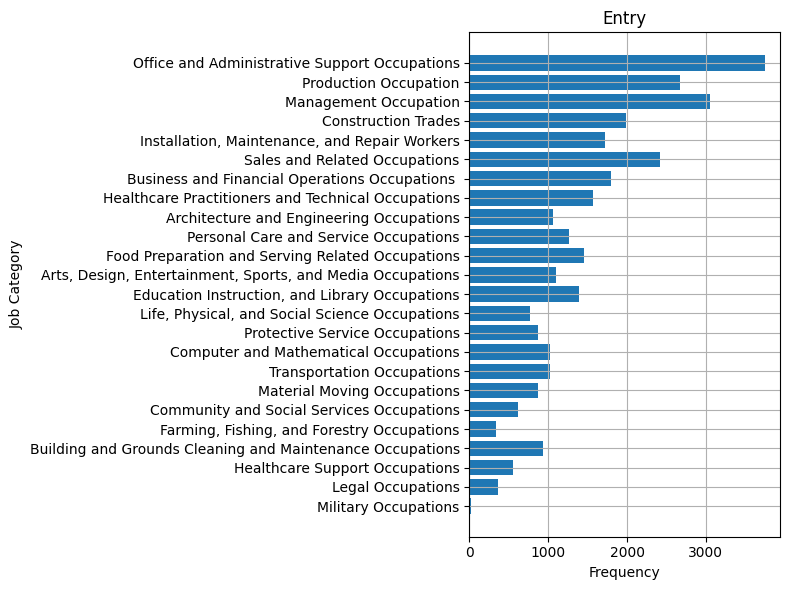

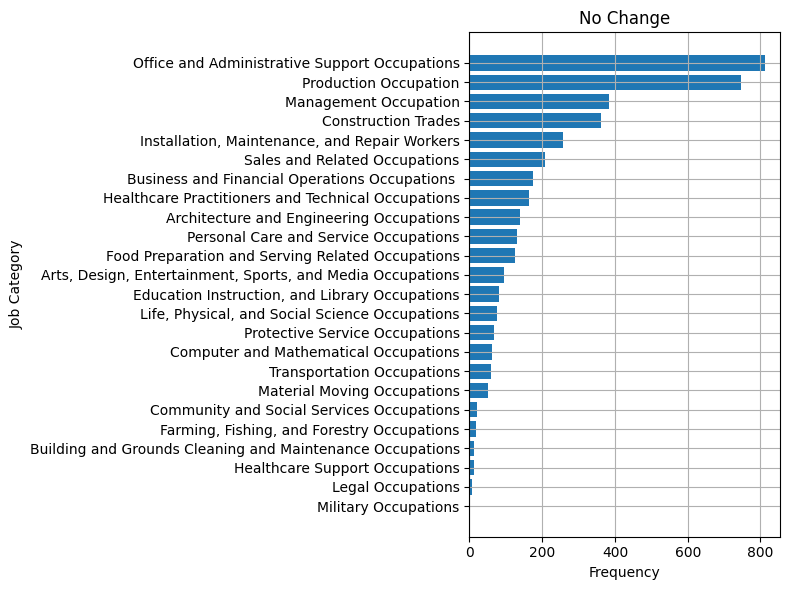

In [8]:
entry_nochange_table = pd.crosstab(G['Target_cat'], G['action'])

# Summing up the counts of 'Entry' and 'No Change' actions for each job category
entry_nochange_table['Total'] = entry_nochange_table['Entry'] + entry_nochange_table['No Change']

# Sorting the table based on 'Entry' counts in ascending order
entry_nochange_table_sorted = entry_nochange_table.sort_values('No Change')

# Plotting 'Entry' histogram
plt.figure(figsize=(8, 6))  # Adjust figure size
plt.barh(entry_nochange_table_sorted.index, entry_nochange_table_sorted['Entry'])
plt.xlabel('Frequency')
plt.ylabel('Job Category')
plt.title('Entry')
plt.tight_layout()
plt.grid()
plt.show()

# Plotting 'No Change' histogram
plt.figure(figsize=(8, 6))  # Adjust figure size
plt.barh(entry_nochange_table_sorted.index, entry_nochange_table_sorted['No Change'])
plt.xlabel('Frequency')
plt.ylabel('Job Category')
plt.title('No Change')
plt.tight_layout()
plt.grid()
plt.show()

In [9]:
selfloop_weights = {}
for node in H.nodes():
    selfloop_weight = sum(H[node][node].get('weight', 0) for edge in H.edges(node) if edge[0] == edge[1])
    selfloop_weights[node] = selfloop_weight

df = pd.DataFrame(selfloop_weights.items(), columns=['Node', 'Weighted Self-Loop'])

print(df)

     Node  Weighted Self-Loop
0      AE                   4
1      MO                  31
2    BFO                    8
3      CM                   2
4    LPSS                  12
5     CSS                  12
6      LO                  26
7     EIL                   3
8   ADESM                   6
9    HPTO                   1
10     HS                  13
11    PSO                   3
12   FPSR                   1
13   BGCM                 118
14    PCS                   4
15     SR                  10
16    OAS                  36
17    FFF                  20
18     CT                   1
19   IMRW                   1
20     PO                   3
21     TO                   5
22    MMO                   2
23    MOS                   0


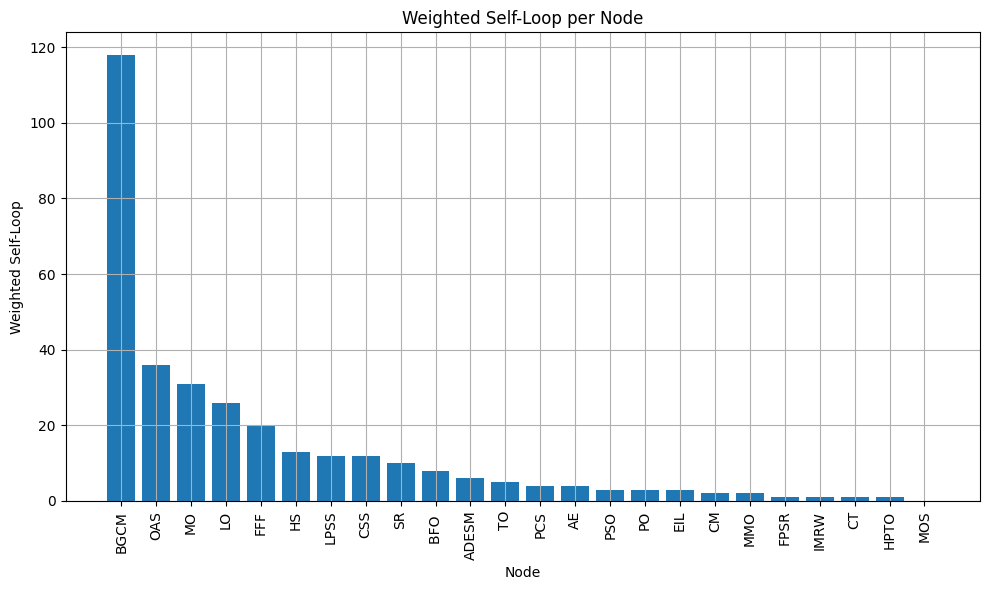

In [10]:
df_sorted = df.sort_values(by='Weighted Self-Loop', ascending=False)

# Plotting histogram for weighted self-loops
plt.figure(figsize=(10, 6))  # Adjust figure size
plt.bar(df_sorted['Node'], df_sorted['Weighted Self-Loop'])
plt.xlabel('Node')
plt.ylabel('Weighted Self-Loop')
plt.title('Weighted Self-Loop per Node')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.grid()
plt.show()

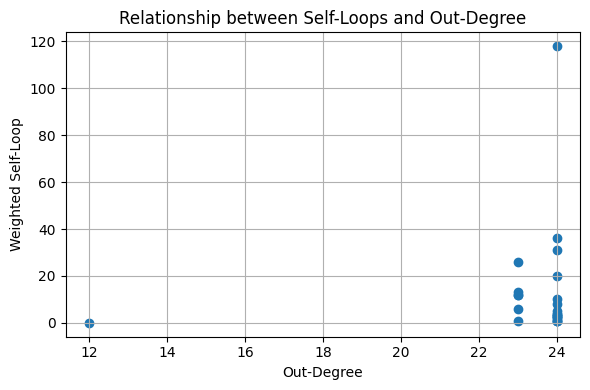

In [12]:
selfloop_weights = {}
for node in H.nodes():
    selfloop_weight = sum(H[node][node].get('weight', 0) for edge in H.edges(node) if edge[0] == edge[1])
    selfloop_weights[node] = selfloop_weight

df = pd.DataFrame(selfloop_weights.items(), columns=['Node', 'Weighted Self-Loop'])

# Calculating out-degree for each node
out_degrees = dict(H.out_degree())

# Merging self-loop weights and out-degrees into a single DataFrame
df['Out-Degree'] = df['Node'].map(out_degrees)

# Plotting the relationship between self-loops and out-degree
plt.figure(figsize=(6, 4))  # Set the figure size

plt.scatter(df['Out-Degree'], df['Weighted Self-Loop'])
plt.xlabel('Out-Degree')
plt.ylabel('Weighted Self-Loop')
plt.title('Relationship between Self-Loops and Out-Degree')
plt.grid(True)
plt.tight_layout()
plt.show()

Number of Nodes: 503
Number of Edges: 36697


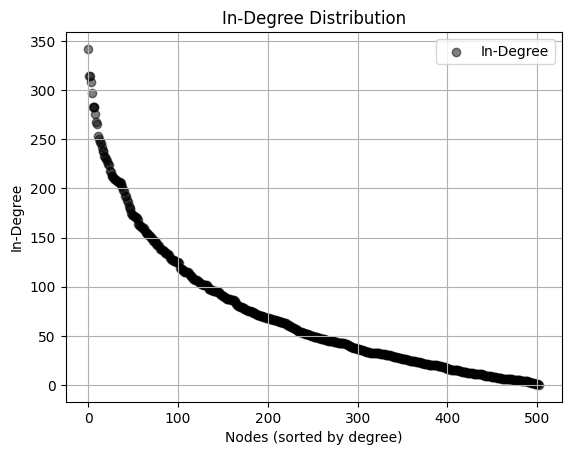

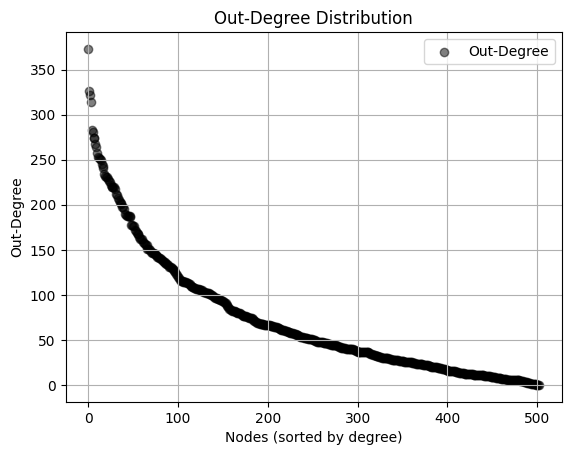

In [13]:
A = pd.read_excel('/Users/jacopobinati/Desktop/jobflow/labornetwork.xlsx')

# Create a directed graph and add edges from the DataFrame
L = nx.DiGraph()
L.add_edges_from(A[['Source', 'Target']].values)

# Add weights to the edges
for row in A.itertuples():
    L.add_edge(row.Source, row.Target, weight=row.Weight)

# Calculate in-degree and out-degree distributions
in_degrees = dict(L.in_degree())
out_degrees = dict(L.out_degree())

# Sort degrees by their values in descending order
sorted_in_degrees = dict(sorted(in_degrees.items(), key=lambda x: x[1], reverse=True))
sorted_out_degrees = dict(sorted(out_degrees.items(), key=lambda x: x[1], reverse=True))

print("Number of Nodes:", L.number_of_nodes())
print("Number of Edges:", L.number_of_edges())
# Plotting in-degree distribution
plt.scatter(range(len(sorted_in_degrees)), list(sorted_in_degrees.values()), color='black', label='In-Degree', alpha=0.5)
plt.xlabel('Nodes (sorted by degree)')
plt.ylabel('In-Degree')
plt.title('In-Degree Distribution')
plt.legend()
plt.grid(True)
plt.show()

# Plotting out-degree distribution
plt.scatter(range(len(sorted_out_degrees)), list(sorted_out_degrees.values()), color='black', label='Out-Degree', alpha=0.5)
plt.xlabel('Nodes (sorted by degree)')
plt.ylabel('Out-Degree')
plt.title('Out-Degree Distribution')
plt.legend()
plt.grid(True)
plt.show()

In [77]:
degree_dict = dict(H.degree())

# Sort the dictionary by values in descending order and get the first 5 nodes
highest_degree_nodes = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:5]

# Print the nodes with the highest degree
for node, degree in highest_degree_nodes:
    print(f'Node: {node}, Degree: {degree}')

Node: MOS, Degree: 7
Node: FPSR, Degree: 1
Node: PCS, Degree: 1
Node: SR, Degree: 1
Node: OAS, Degree: 1


In [76]:
degree_dict = dict(L.degree())

# Sort the dictionary by values in descending order and get the first 5 nodes
highest_degree_nodes = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:5]

# Print the nodes with the highest degree
for node, degree in highest_degree_nodes:
    print(f'Node: {node}, Degree: {degree}')

Node: 430, Degree: 715
Node: 4700, Degree: 636
Node: 9130, Degree: 634
Node: 4760, Degree: 628
Node: 9620, Degree: 580


In [14]:
degrees = dict(L.degree())
avg_degree = sum(degrees.values()) / len(degrees)

log_nodes = np.log10(503)

print("Logarithm of Nodes:", log_nodes)
print("Average Degree:", avg_degree)

Logarithm of Nodes: 2.7015679850559273
Average Degree: 145.91252485089464


In [79]:
in_degrees = dict(L.in_degree())
out_degrees = dict(L.out_degree())

in_degrees = {k: v for k, v in in_degrees.items() if v > 0}
out_degrees = {k: v for k, v in out_degrees.items() if v > 0}

sorted_in_degrees = dict(sorted(in_degrees.items(), key=lambda x: x[1], reverse=True))
sorted_out_degrees = dict(sorted(out_degrees.items(), key=lambda x: x[1], reverse=True))

log_in_degrees = np.log10(list(sorted_in_degrees.values()))
log_out_degrees = np.log10(list(sorted_out_degrees.values()))

x_in = np.log10(np.arange(1, len(log_in_degrees) + 1)).reshape(-1, 1)
x_out = np.log10(np.arange(1, len(log_out_degrees) + 1)).reshape(-1, 1)

reg_in = LinearRegression().fit(x_in, log_in_degrees)
reg_out = LinearRegression().fit(x_out, log_out_degrees)

exponent_in = -reg_in.coef_[0]
exponent_out = -reg_out.coef_[0]

print("Exponent of In-Degree Distribution:", exponent_in)
print("Exponent of Out-Degree Distribution:", exponent_out)

Exponent of In-Degree Distribution: 0.9844147364718482
Exponent of Out-Degree Distribution: 0.9768568627927784


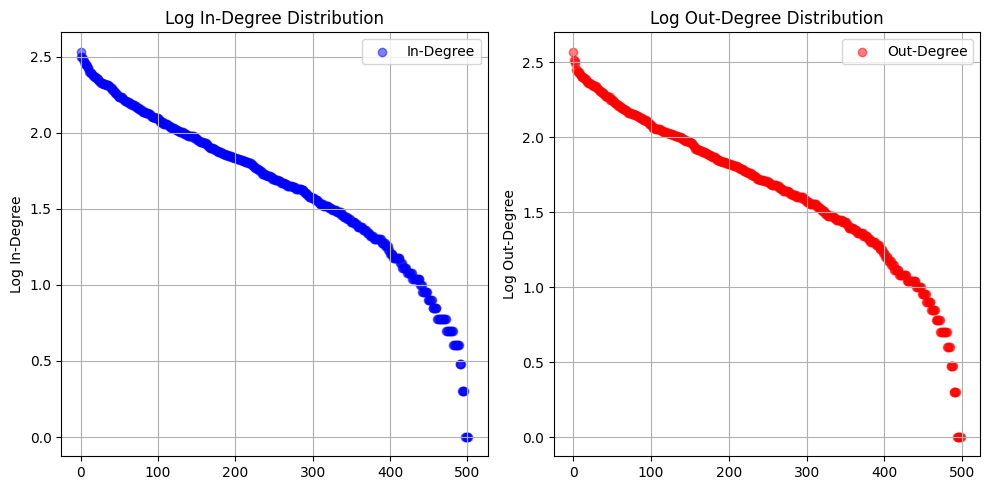

In [80]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(range(len(log_in_degrees)), log_in_degrees, color='blue', label='In-Degree', alpha=0.5)
plt.ylabel('Log In-Degree')
plt.title('Log In-Degree Distribution')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(range(len(log_out_degrees)), log_out_degrees, color='red', label='Out-Degree', alpha=0.5)
plt.ylabel('Log Out-Degree')
plt.title('Log Out-Degree Distribution')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

/var/folders/6t/d3d0rh5d1rd426bk9g_mnhd00000gn/T/ipykernel_17726/3108732415.py:8: RuntimeWarning: divide by zero encountered in log
  log_in_degrees = np.log(in_degrees)
/var/folders/6t/d3d0rh5d1rd426bk9g_mnhd00000gn/T/ipykernel_17726/3108732415.py:9: RuntimeWarning: divide by zero encountered in log
  log_out_degrees = np.log(out_degrees)


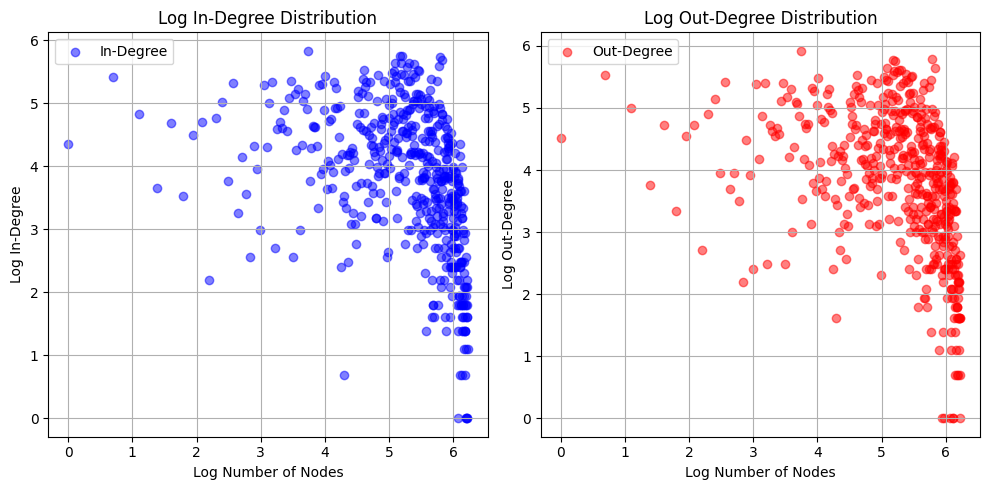

In [18]:
num_nodes = len(L.nodes())
log_num_nodes = np.log(range(1, num_nodes + 1))

in_degrees = [d for n, d in L.in_degree()]
out_degrees = [d for n, d in L.out_degree()]

# Compute the logarithm
log_in_degrees = np.log(in_degrees)
log_out_degrees = np.log(out_degrees)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(log_num_nodes, log_in_degrees, color='blue', label='In-Degree', alpha=0.5)
plt.xlabel('Log Number of Nodes')
plt.ylabel('Log In-Degree')
plt.title('Log In-Degree Distribution')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(log_num_nodes, log_out_degrees, color='red', label='Out-Degree', alpha=0.5)
plt.xlabel('Log Number of Nodes')
plt.ylabel('Log Out-Degree')
plt.title('Log Out-Degree Distribution')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [19]:
# Detection of communities
for row in G.itertuples():
    H.add_edge(row.Source, row.Target, weight=row.Weight)

partition = community.greedy_modularity_communities(H)
num_communities = len(partition)
print("Number of communities detected:", num_communities)

Number of communities detected: 2


In [20]:
avg_shortest_path_length = nx.average_shortest_path_length(L)

print("Average Shortest Path Length:", avg_shortest_path_length)


Average Shortest Path Length: 1.9061606456876272


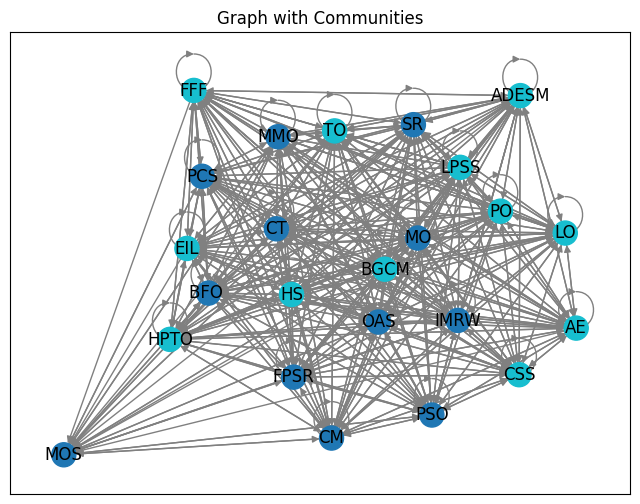

In [21]:
# Louvain method for community detection
partition = community.greedy_modularity_communities(H)

node_community_mapping = {}
for idx, community_nodes in enumerate(partition):
    for node in community_nodes:
        node_community_mapping[node] = idx

node_colors = [node_community_mapping[node] for node in H.nodes()]

pos = nx.spring_layout(H)  
plt.figure(figsize=(8, 6))  
nx.draw_networkx(
    H,
    pos,
    node_color=node_colors,
    cmap='tab10', 
    with_labels=True,
    edge_color='grey' 
)
plt.title('Graph with Communities')
plt.show()

In [24]:
strongly_connected_components = list(nx.strongly_connected_components(L))
largest_scc = max(strongly_connected_components, key=len)
num_giant_components = len(largest_scc)

print("Number of Nodes in Giant Component:", num_giant_components)


Number of Nodes in Giant Component: 498


In [30]:
largest_scc_sizes = []

# Assuming H is your graph
initial_scc = len(max(nx.kosaraju_strongly_connected_components(H), key=len))
largest_scc_sizes.append(initial_scc)

edges = list(H.edges())
num_edges = len(edges)

threshold = None
for i in range(num_edges):
    edge = edges[i]
    H.remove_edge(*edge)
    
    scc_size = len(max(nx.kosaraju_strongly_connected_components(H), key=len))
    largest_scc_sizes.append(scc_size)
    
    if scc_size == 1:
        threshold = i + 1
        break

if threshold is not None:
    print(f"Threshold where a single giant component doesn't exist: {threshold}")
else:
    print("A single giant component exists throughout the edge removal process.")

Threshold where a single giant component doesn't exist: 1


even after systematically removing edges from the graph, there was no point at which the graph fragmented into multiple disconnected components.

In graph theory, a "giant component" refers to the largest connected component in a graph. When a "single giant component exists throughout the edge removal process," it means that even after removing edges one by one, the graph remained connected as a single large component. This implies that the graph is highly connected and resilient to edge removal.

In simpler terms, despite removing edges, the graph maintained its overall connectedness, indicating that a significant portion of the nodes remained interconnected, and there was no point at which the graph split into multiple disconnected parts. This characteristic is often observed in highly connected networks or graphs with a strong interconnection among nodes.

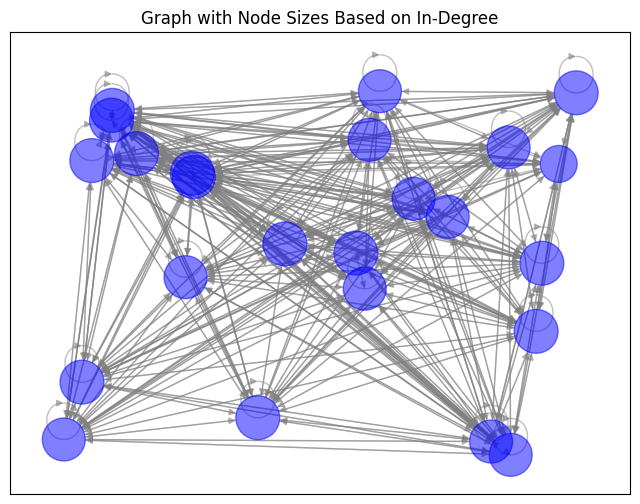

In [ ]:
in_degrees = dict(H.in_degree())

max_size = 1000
min_size = 1
max_degree = max(in_degrees.values())
node_sizes = [min_size + (max_size - min_size) * (in_degrees[node] / max_degree) for node in H.nodes()]

plt.figure(figsize=(8, 6))

nx.draw_networkx(
    H,
    pos=nx.random_layout(H),
    with_labels=False,
    node_size=node_sizes,
    node_color='blue',  # Example node color
    edge_color='gray',  # Example edge color
    alpha=0.5,
)

plt.title("Graph with Node Sizes Based on In-Degree")
plt.show()

In [33]:
H.nodes()
H.edges()

OutEdgeView([('MOS', 'FPSR'), ('MOS', 'PCS'), ('MOS', 'SR'), ('MOS', 'OAS'), ('MOS', 'CT'), ('MOS', 'IMRW'), ('MOS', 'MMO')])

In [75]:

# Calculate betweenness centrality for each node
betweenness_centrality = nx.betweenness_centrality(L)

# Create a DataFrame from the betweenness centrality
df = pd.DataFrame(list(betweenness_centrality.items()), columns=['Node', 'Betweenness Centrality'])
# Print the DataFrame
df.head()

,Node,Betweenness Centrality
0,1300,0.000544
1,10,0.012318
2,1360,0.003072
3,1400,0.000165
4,1410,0.001868


In [69]:
# Calculate betweenness centrality for each node
betweenness_centrality = nx.betweenness_centrality(L)

# Create a DataFrame from the betweenness centrality
df = pd.DataFrame.from_dict(betweenness_centrality, orient='index', columns=['Betweenness Centrality'])

# Sort the DataFrame in descending order of Betweenness Centrality
df = df.sort_values('Betweenness Centrality', ascending=False)

df.head(10)

,Betweenness Centrality
430,0.045135
9130,0.031641
4700,0.029560
9620,0.028808
4760,0.025092
4220,0.024623
8960,0.022430
4720,0.018322
6230,0.016852
6260,0.016235


In [29]:
eigenvector_centrality = nx.eigenvector_centrality(L, max_iter=100)
for node, centrality in eigenvector_centrality.items():
    ranked_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)

for rank, node in enumerate(ranked_nodes, start=1):
    centrality = eigenvector_centrality[node]
    print(f"Rank {rank}: Node {node}, Eigenvector Centrality - {centrality}")

eigenvector_centrality = nx.eigenvector_centrality(H, max_iter=100)

# Sort nodes by eigenvector centrality
ranked_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)

data = {
    'Node': ranked_nodes,
    'Eigenvector Centrality': [eigenvector_centrality[node] for node in ranked_nodes]
}
df = pd.DataFrame(data)

# Display the table
print(df) 

Rank 1: Node 430, Eigenvector Centrality - 0.11943329552436141
Rank 2: Node 4760, Eigenvector Centrality - 0.11525702949465921
Rank 3: Node 4700, Eigenvector Centrality - 0.1144213627170763
Rank 4: Node 9130, Eigenvector Centrality - 0.11082830592693568
Rank 5: Node 5240, Eigenvector Centrality - 0.11058923116446046
Rank 6: Node 4720, Eigenvector Centrality - 0.10915880569537928
Rank 7: Node 4220, Eigenvector Centrality - 0.10821351825604687
Rank 8: Node 9620, Eigenvector Centrality - 0.10792089398993183
Rank 9: Node 5700, Eigenvector Centrality - 0.10687850830737947
Rank 10: Node 5000, Eigenvector Centrality - 0.1058035613045079
Rank 11: Node 4110, Eigenvector Centrality - 0.10006199982712422
Rank 12: Node 2310, Eigenvector Centrality - 0.09999112890978974
Rank 13: Node 4850, Eigenvector Centrality - 0.09908314187151346
Rank 14: Node 4020, Eigenvector Centrality - 0.09889162852811356
Rank 15: Node 6230, Eigenvector Centrality - 0.09886630783984443
Rank 16: Node 5620, Eigenvector Centr

In [35]:
print(nx.average_clustering(L))

0.5710734865288863


In [38]:
degree_centrality = nx.degree_centrality(H)
betweenness_centrality = nx.betweenness_centrality(H)

for node in H.nodes:
    print(f"Node {node}: Degree Centrality - {degree_centrality[node]}, Betweenness Centrality - {betweenness_centrality[node]}")

Node AE: Degree Centrality - 0.0, Betweenness Centrality - 0.0
Node MO: Degree Centrality - 0.0, Betweenness Centrality - 0.0
Node BFO : Degree Centrality - 0.0, Betweenness Centrality - 0.0
Node CM: Degree Centrality - 0.0, Betweenness Centrality - 0.0
Node LPSS: Degree Centrality - 0.0, Betweenness Centrality - 0.0
Node CSS: Degree Centrality - 0.0, Betweenness Centrality - 0.0
Node LO: Degree Centrality - 0.0, Betweenness Centrality - 0.0
Node EIL: Degree Centrality - 0.0, Betweenness Centrality - 0.0
Node ADESM: Degree Centrality - 0.0, Betweenness Centrality - 0.0
Node HPTO: Degree Centrality - 0.0, Betweenness Centrality - 0.0
Node HS: Degree Centrality - 0.0, Betweenness Centrality - 0.0
Node PSO: Degree Centrality - 0.0, Betweenness Centrality - 0.0
Node FPSR: Degree Centrality - 0.043478260869565216, Betweenness Centrality - 0.0
Node BGCM: Degree Centrality - 0.0, Betweenness Centrality - 0.0
Node PCS: Degree Centrality - 0.043478260869565216, Betweenness Centrality - 0.0
Node

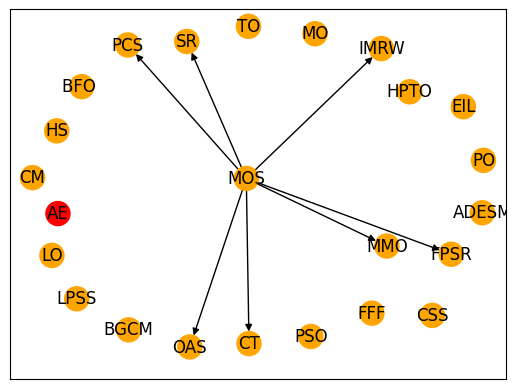

  Group 1 Group 2 Group 3 Group 4 Group 5 Group 6 Group 7 Group 8 Group 9   
0      AE      MO    BFO       CM    LPSS     CSS      LO     EIL   ADESM  \
1    None    None    None    None    None    None    None    None    None   
2    None    None    None    None    None    None    None    None    None   
3    None    None    None    None    None    None    None    None    None   
4    None    None    None    None    None    None    None    None    None   
5    None    None    None    None    None    None    None    None    None   
6    None    None    None    None    None    None    None    None    None   

  Group 10 Group 11 Group 12 Group 13 Group 14 Group 15 Group 16 Group 17   
0     HPTO       HS      PSO     FPSR     BGCM     IMRW      FFF       PO  \
1     None     None     None     None     None      PCS     None     None   
2     None     None     None     None     None      MOS     None     None   
3     None     None     None     None     None       SR     None     None  

In [63]:
from networkx.algorithms.community.centrality import girvan_newman
communities = girvan_newman(H)
node_groups = []
for com in next(communities):
    node_groups.append(list(com))

color_map = []
for node in H:
    if node in node_groups[0]:
        color_map.append("red")
    else:
        color_map.append("orange")
nx.draw_networkx(H, node_color=color_map, with_labels=True)
plt.show()
df = pd.DataFrame(node_groups)

df = df.transpose()
df.columns = [f'Group {i+1}' for i in range(len(node_groups))]
print(df)